<a href="https://colab.research.google.com/github/savitskaya-om/python/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HH_api_hometask_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте аналогичный vacancy DataFrame только добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [56]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd

In [57]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [58]:
res = requests.get(url)

In [59]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vnum  = vacancies.get('pages')

In [60]:
#all_vacs - все вакансии
all_vacs = []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    all_vacs = all_vacs + vacancies.get("items")

  0%|          | 0/13 [00:00<?, ?it/s]

In [61]:
#оставляем только нужные поля
all_vacs2 = []
keys = ["id","name", "snippet", 'created_at', 'type','alternate_url']
for i in tqdm(range(len(all_vacs))):
  all_vacs2_i = [all_vacs[i].get(key) for key in keys]
  all_vacs2_i = dict(zip(keys, all_vacs2_i))
  all_vacs2.append(all_vacs2_i)

  0%|          | 0/1207 [00:00<?, ?it/s]

In [62]:
#делаем pd.DataFrame со всеми вакансиями из list of dicts 
vacs_df = pd.json_normalize(all_vacs2)
vacs_df.head()

,id,name,created_at,alternate_url,snippet.requirement,snippet.responsibility,type.id,type.name
0,53361761,Клиентский менеджер малого и микробизнеса,2022-06-27T12:47:08+0300,https://hh.ru/vacancy/53361761,"высшее образование (финансы/банки, экономика/б...",консультировать корпоративных клиентов по прод...,open,Открытая
1,55415805,Менеджер по работе с клиентами,2022-07-20T13:47:49+0300,https://hh.ru/vacancy/55415805,Опыт работы консультантом или промоутером прив...,Продавать банковские продукты и сервисы в моби...,open,Открытая
2,55415496,Клиентский менеджер прямых продаж,2022-07-22T11:48:06+0300,https://hh.ru/vacancy/55415496,None,Выезжать к клиентам на индивидуальные консульт...,open,Открытая
3,67349462,Старший клиентский менеджер,2022-07-18T11:47:43+0300,https://hh.ru/vacancy/67349462,"Специалист со средним профессиональным, неполн...",Доброжелателен и готов помогать клиентам. Пред...,open,Открытая
4,67867647,Junior UX/UI Дизайнер,2022-07-18T13:04:17+0300,https://hh.ru/vacancy/67867647,"Отлично владеешь Figma, Sketch/Adobe Photoshop...","Постоянно улучшать юзабилити продукта, опираяс...",open,Открытая


In [ ]:
# all_vacancy_ids= []
# all_vac_fields = []
# keys = ["id","name", "snippet", 'created_at', 'type','alternate_url']
# for i in tqdm(range(vnum)):
#     url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
#     res = requests.get(url)
#     vacancies = res.json()
#     vacancy_ids = [el.get('id') for el in vacancies.get('items')]
#     vac_fields = dict(zip(keys, [el.get(key) for el in vacancies.get('items') for key in keys]))
#     all_vacancy_ids.extend(vacancy_ids)
#     all_vac_fields.extend(vac_fields)

  0%|          | 0/12 [00:00<?, ?it/s]

In [63]:
#проходим по url всех id вакансий и извлекаем поле skills, формируем список из словарей - {id: skills}
all_skills = []
for i in tqdm(range (len(all_vacs2))):
  url = f'https://api.hh.ru/vacancies/{all_vacs2[i].get("id")}'
  skills = {"id": all_vacs2[i].get("id"), "skills":[x.get("name") for x in requests.get(url).json().get('key_skills')]}
  all_skills.append(skills)

  0%|          | 0/1207 [00:00<?, ?it/s]

In [64]:
#делаем pd.DataFrame со всеми скиллами вакансий из list of dicts 
skills_df = pd.json_normalize(all_skills)
for i in range(len(skills_df)):
  skills_df["skills"][i] = ', '.join([str(el) for el in skills_df["skills"][i] ])
skills_df.head()

,id,skills
0,53361761,"Активные продажи, Проведение презентаций, Прив..."
1,55415805,
2,55415496,
3,67349462,
4,67867647,"UX, Figma, Adobe Photoshop, UI, Дизайн интерфе..."


In [65]:
#склеиваем vacs_df и skills_df по id
vacs_df = vacs_df.set_index("id").join(skills_df.set_index("id"))
vacs_df = vacs_df.reset_index()
vacs_df.head()

,id,name,created_at,alternate_url,snippet.requirement,snippet.responsibility,type.id,type.name,skills
0,53361761,Клиентский менеджер малого и микробизнеса,2022-06-27T12:47:08+0300,https://hh.ru/vacancy/53361761,"высшее образование (финансы/банки, экономика/б...",консультировать корпоративных клиентов по прод...,open,Открытая,"Активные продажи, Проведение презентаций, Прив..."
1,55415805,Менеджер по работе с клиентами,2022-07-20T13:47:49+0300,https://hh.ru/vacancy/55415805,Опыт работы консультантом или промоутером прив...,Продавать банковские продукты и сервисы в моби...,open,Открытая,
2,55415496,Клиентский менеджер прямых продаж,2022-07-22T11:48:06+0300,https://hh.ru/vacancy/55415496,None,Выезжать к клиентам на индивидуальные консульт...,open,Открытая,
3,67349462,Старший клиентский менеджер,2022-07-18T11:47:43+0300,https://hh.ru/vacancy/67349462,"Специалист со средним профессиональным, неполн...",Доброжелателен и готов помогать клиентам. Пред...,open,Открытая,
4,67867647,Junior UX/UI Дизайнер,2022-07-18T13:04:17+0300,https://hh.ru/vacancy/67867647,"Отлично владеешь Figma, Sketch/Adobe Photoshop...","Постоянно улучшать юзабилити продукта, опираяс...",open,Открытая,"UX, Figma, Adobe Photoshop, UI, Дизайн интерфе..."


In [66]:
# перевести даты в формат datetime
vacs_df.created_at = pd.to_datetime(vacs_df.created_at)
vacs_df.created_at =vacs_df.created_at.dt.strftime('%m/%d/%Y')

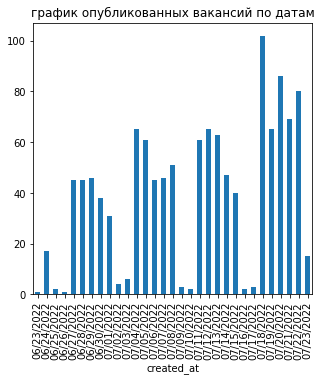

In [67]:
#построить график опубликованных вакансий по датам
vacs_df.groupby('created_at')['id'].count().plot(kind='bar', title = "график опубликованных вакансий по датам");
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

In [68]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
vacs_df.created_at = pd.to_datetime(vacs_df.created_at, errors='coerce')
vacs_df.nlargest(1, 'created_at')["created_at"].dt.strftime('%A')

130    Saturday
Name: created_at, dtype: object

In [94]:
#Найдите те вакансии с использованием python, которые вам интересны
vacs_ilike = vacs_df.loc[(vacs_df["snippet.requirement"].str.lower().str.contains("python", na=False)) & ((vacs_df.name.str.lower().str.contains("data analyst"))|(vacs_df.name.str.lower().str.contains("data scientist")))].copy()
vacs_ilike.head()

,id,name,created_at,alternate_url,snippet.requirement,snippet.responsibility,type.id,type.name,skills
11,67735776,Стажер Data Analyst,2022-07-13,https://hh.ru/vacancy/67735776,Программирование на Python. Знание SQL. Базово...,Голосовые помощники и чат-боты. Анализ диалого...,open,Открытая,"Python, SQL"
17,67737477,Стажер Data Scientist,2022-07-13,https://hh.ru/vacancy/67737477,"Знание математической статистики, линейной алг...",Разрабатывать модели на табличных данных на гр...,open,Открытая,
238,67264063,Data Scientist ML/CV (middle),2022-06-27,https://hh.ru/vacancy/67264063,Аналогичный опыт работы от 1-года. Тех. стек: ...,Разрабатывать ML - математические модели в раз...,open,Открытая,"Машинное обучение, Компьютерное зрение, ML, CV"
416,67617540,Data Scientist (Центр валидации моделей сервис...,2022-07-08,https://hh.ru/vacancy/67617540,Знание машинного обучения и статистического ан...,Разрабатываем и автоматизируем методы для вали...,open,Открытая,
427,66554726,Data analyst,2022-07-22,https://hh.ru/vacancy/66554726,"Хорошие знания SQL, опыт работы с одной из рел...",Проведение ad-hoc аналитики на данных рекламы ...,open,Открытая,


In [176]:
#Определите по полю skills какие навыки больше всего востребованы для этих вакансий
vacs_ilike_skills_list = []
for i in range(len(vacs_ilike)):
  vacs_ilike_skills_list.append(vacs_ilike["skills"].reset_index(drop = True).loc[i].split(","))
flat_list = [x for xs in vacs_ilike_skills_list for x in xs]
ser = pd.Series(flat_list)
ser.groupby(ser).count().sort_values()[-6:-1]

 NLP       2
 Spark     3
 Hadoop    4
 SQL       4
Python     6
dtype: int64

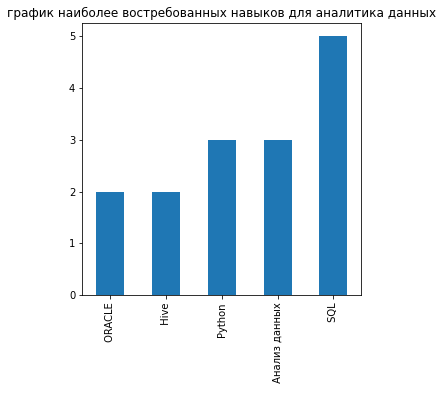

In [175]:
#Постройте график наиболее востребованных навыков для аналитика данных
vacs_da = vacs_df.loc[(vacs_df.name.str.lower().str.contains("аналитик данных")) | (vacs_df.name.str.lower().str.contains("data analyst"))]
vacs_da_skills_list = []
for i in range(len(vacs_da)):
  vacs_da_skills_list.append(vacs_da["skills"].reset_index(drop = True).loc[i].split(","))
flat_list = [x for xs in vacs_da_skills_list for x in xs]
ser = pd.Series(flat_list)
ser.groupby(ser).count().sort_values()[-6:-1].plot(kind='bar', title = "график наиболее востребованных навыков для аналитика данных")